<a href="https://www.kaggle.com/code/owaiskhan9654/recommendation-system-sony-rise-3rd-place?scriptVersionId=124577518" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **<span style="color:#ff4871;">Hybrid Recommender System Based on this Sony R.I.S.E Research Challenge</span>**
![image.png](https://raw.githubusercontent.com/Owaiskhan9654/Sony-R.I.S.E-India-Hackathon-3rd-Place-Solution/main/17412c407a-Cover2x%20-%20Copy.png)

# **<span style="color:#ff4871;">Research Competetion on HackerEarth</span>** [Link](https://www.hackerearth.com/challenges/competitive/sony-research-indias-rise/)

## <span style="color:#ff4871;">Contact Information</span>

- **<span style="color:#ff4871;font-size:20px">Name</span>** - Owais Ahmad
- **<span style="color:#ff4871;font-size:20px">Phone</span>** - +91-9515884381
- **<span style="color:#ff4871;font-size:20px">Email</span>** - owaiskhan9654@gmail.com
- **<span style="color:#ff4871;font-size:20px">Portfolio</span>** - https://owaiskhan9654.github.io/

## **<span style="color:#ff4871;">Refrences</span>**

- [Collaborative Filtering Based Recommender System](https://www.kaggle.com/code/rangarajansaranathan/collaborative-filtering-based-recommender-system)
 
 
- [Predicting and Detecting the Relevant Contextual Information in a Movie-Recommender System, Interacting with Computers](https://doi.org/10.1093/iwc/iws003)


- [Movie Recommender Systems](https://www.kaggle.com/code/rounakbanik/movie-recommender-systems)


- [A movie recommender system based on inductive learning](https://ieeexplore.ieee.org/abstract/document/1460433) 

 **<span style="color:#ff4871;font-size:15px">Recommender systems are among the most popular applications of data science today. They are used to predict the "rating" or "preference" that a user would give to an item. In this Challenge I have computed and extracted several Features in order to Build this Hybrid Collaborative Recommender System</span>**

# **<span style="color:#ff4871">Basic Imports and Reading the Dataset</span>**

In [1]:
import pandas as pd
from datetime import date

from tqdm.notebook import tqdm
from pprint import pprint


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


from plotly.subplots import make_subplots
import numpy as np
sns.set_context('paper')

In [2]:
df_content = pd.read_csv('../input/rise-research-innovate-solve-excel/content.csv')
df_content

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10
...,...,...,...,...,...,...,...,...,...
48640,cont_4218_6_15,series,hindi,drama,3360000,2015-02-04,6,15,6
48641,cont_2533_1_14,series,marathi,sci-fi,3120000,2002-01-15,4,14,1
48642,cont_4606_33_5,series,hindi,drama,3180000,2006-02-18,6,5,33
48643,cont_3708_9_1,series,english,drama,4020000,2010-04-12,5,1,9


In [3]:
df_user = pd.read_csv('../input/rise-research-innovate-solve-excel/user.csv')
df_user

,user_id,user_age,gender,location,joining_date
0,user_45028@domain.com,40,M,Goa,2018-06-18
1,user_95235@domain.com,55,F,Andhra Pradesh,2019-09-17
2,user_44289@domain.com,38,F,Goa,2018-09-03
3,user_23708@domain.com,47,F,West Bengal,2020-11-15
4,user_40584@domain.com,24,M,Tamil Nadu,2018-02-06
...,...,...,...,...,...
13838,user_5748@domain.com,58,M,Jharkhand,2019-06-18
13839,user_16037@domain.com,52,F,Odisa,2018-07-07
13840,user_58718@domain.com,19,F,Mizoram,2019-09-01
13841,user_82850@domain.com,52,M,Kerala,2020-01-22


In [4]:
df_relationship = pd.read_csv('../input/rise-research-innovate-solve-excel/relationship.csv')
df_relationship

,user_id,content_id,duration,date,start_time,end_time
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,06:19:13,06:51:13
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,19:58:14,20:16:14
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,01:52:51,01:55:51
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,06:34:14,06:58:14
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,16:57:19,17:13:19
...,...,...,...,...,...,...
1654445,user_62890@domain.com,cont_3832_2_5,1080000,2019-10-03,04:09:22,04:27:22
1654446,user_92034@domain.com,cont_4168_4_5,2400000,2021-03-06,18:41:13,19:21:13
1654447,user_44476@domain.com,cont_1780_7_17,540000,2019-04-03,21:52:42,22:01:42
1654448,user_73736@domain.com,cont_3432_4_6,1320000,2021-07-24,18:50:31,19:12:31


In [5]:
df_test = pd.read_csv('../input/rise-research-innovate-solve-excel/test.csv')

# **<span style="color:#ff4871;">Data Pre-Processing</span>**

In [6]:
%%time
def age_range_fn(row):
    if row['user_age'] in range(0, 20):
        age_range = "0-20"
    elif row['user_age'] in range(20, 30):
        age_range = "20-30"

    elif row['user_age'] in range(30, 40):
        age_range = "30-40"

    elif row['user_age'] in range(40, 50):
        age_range = "40-50"
    elif row['user_age'] in range(50, 60):
        age_range = "50-60"

    elif row['user_age'] in range(60, 100):
        age_range = "Above 60"

    return age_range


df_user["age_range"] = df_user.apply(age_range_fn, axis=1)

df_user

CPU times: user 305 ms, sys: 1.9 ms, total: 307 ms
Wall time: 310 ms


,user_id,user_age,gender,location,joining_date,age_range
0,user_45028@domain.com,40,M,Goa,2018-06-18,40-50
1,user_95235@domain.com,55,F,Andhra Pradesh,2019-09-17,50-60
2,user_44289@domain.com,38,F,Goa,2018-09-03,30-40
3,user_23708@domain.com,47,F,West Bengal,2020-11-15,40-50
4,user_40584@domain.com,24,M,Tamil Nadu,2018-02-06,20-30
...,...,...,...,...,...,...
13838,user_5748@domain.com,58,M,Jharkhand,2019-06-18,50-60
13839,user_16037@domain.com,52,F,Odisa,2018-07-07,50-60
13840,user_58718@domain.com,19,F,Mizoram,2019-09-01,0-20
13841,user_82850@domain.com,52,M,Kerala,2020-01-22,50-60


In [7]:
data = pd.merge(df_user, df_relationship, on='user_id')
data.head()

,user_id,user_age,gender,location,joining_date,age_range,content_id,duration,date,start_time,end_time
0,user_44289@domain.com,38,F,Goa,2018-09-03,30-40,cont_3375_16_10,2220000,2020-06-03,18:47:17,19:24:17
1,user_44289@domain.com,38,F,Goa,2018-09-03,30-40,cont_1195_1_8,900000,2019-04-18,11:12:40,11:27:40
2,user_44289@domain.com,38,F,Goa,2018-09-03,30-40,cont_3470_2_15,1620000,2021-09-18,11:55:34,12:22:34
3,user_44289@domain.com,38,F,Goa,2018-09-03,30-40,cont_310_25_9,780000,2020-08-09,11:38:44,11:51:44
4,user_44289@domain.com,38,F,Goa,2018-09-03,30-40,cont_4350_1_3,3480000,2021-06-25,23:42:44,00:40:44


In [8]:
df_map = pd.merge(data, df_content, on='content_id')
df_map

,user_id,user_age,gender,location,joining_date,age_range,content_id,duration_x,date,start_time,end_time,content_type,language,genre,duration_y,release_date,rating,episode_count,season_count
0,user_44289@domain.com,38,F,Goa,2018-09-03,30-40,cont_3375_16_10,2220000,2020-06-03,18:47:17,19:24:17,series,english,action,3060000,2015-11-16,5,10,16
1,user_29171@domain.com,46,M,Odisa,2019-06-18,40-50,cont_3375_16_10,1980000,2021-06-24,00:30:37,01:03:37,series,english,action,3060000,2015-11-16,5,10,16
2,user_91037@domain.com,16,F,Maharashtra,2017-10-26,0-20,cont_3375_16_10,2580000,2018-04-02,22:56:40,23:39:40,series,english,action,3060000,2015-11-16,5,10,16
3,user_78324@domain.com,53,F,Andhra Pradesh,2018-03-16,50-60,cont_3375_16_10,420000,2020-12-02,12:23:56,12:30:56,series,english,action,3060000,2015-11-16,5,10,16
4,user_69522@domain.com,21,M,Karnataka,2019-06-30,20-30,cont_3375_16_10,1380000,2021-03-29,21:19:41,21:42:41,series,english,action,3060000,2015-11-16,5,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654445,user_49924@domain.com,27,F,Gujarat,2018-07-09,20-30,cont_103_3_4,1800000,2020-06-14,08:37:03,09:07:03,series,gujarati,drama,3120000,1997-04-23,9,4,3
1654446,user_49737@domain.com,52,F,Gujarat,2018-04-01,50-60,cont_103_3_4,2520000,2018-12-20,23:06:43,23:48:43,series,gujarati,drama,3120000,1997-04-23,9,4,3
1654447,user_12003@domain.com,40,M,Gujarat,2017-11-07,40-50,cont_103_3_4,540000,2018-03-31,13:59:48,14:08:48,series,gujarati,drama,3120000,1997-04-23,9,4,3
1654448,user_72744@domain.com,25,F,Gujarat,2019-07-02,20-30,cont_103_3_4,480000,2020-04-13,11:45:48,11:53:48,series,gujarati,drama,3120000,1997-04-23,9,4,3


# **<span style="color:#ff4871;">Exploratory Data Analysis </span>**

<AxesSubplot:title={'center':'Gender wise Age Range Users on OTT Platform'}, xlabel='gender', ylabel='count'>

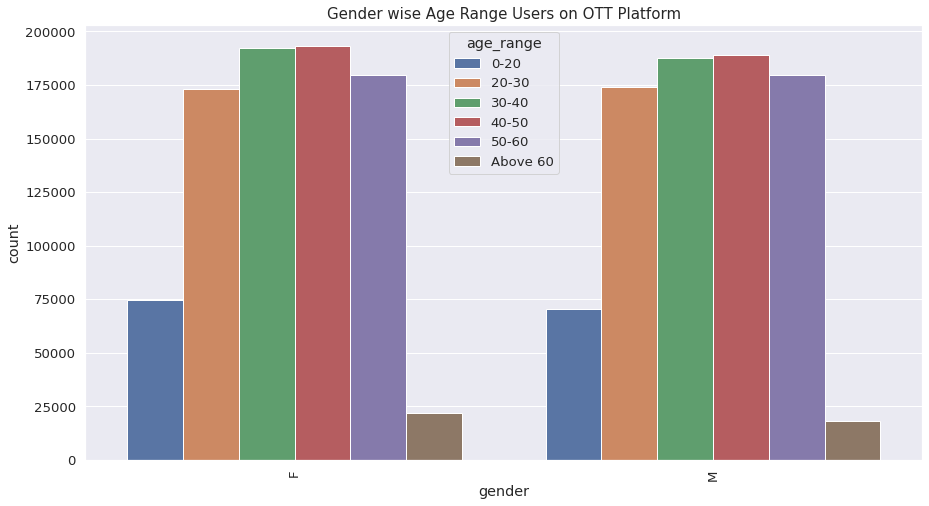

In [9]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.title("Gender wise Age Range Users on OTT Platform", fontsize=15)
hue_order = ['0-20', '20-30', '30-40', '40-50', '50-60', 'Above 60']
sns.countplot(
    x='gender',
    hue='age_range',
    hue_order=hue_order,
    data=df_map)  

<AxesSubplot:title={'center':'Content Type Counts in Different Location'}, xlabel='location', ylabel='count'>

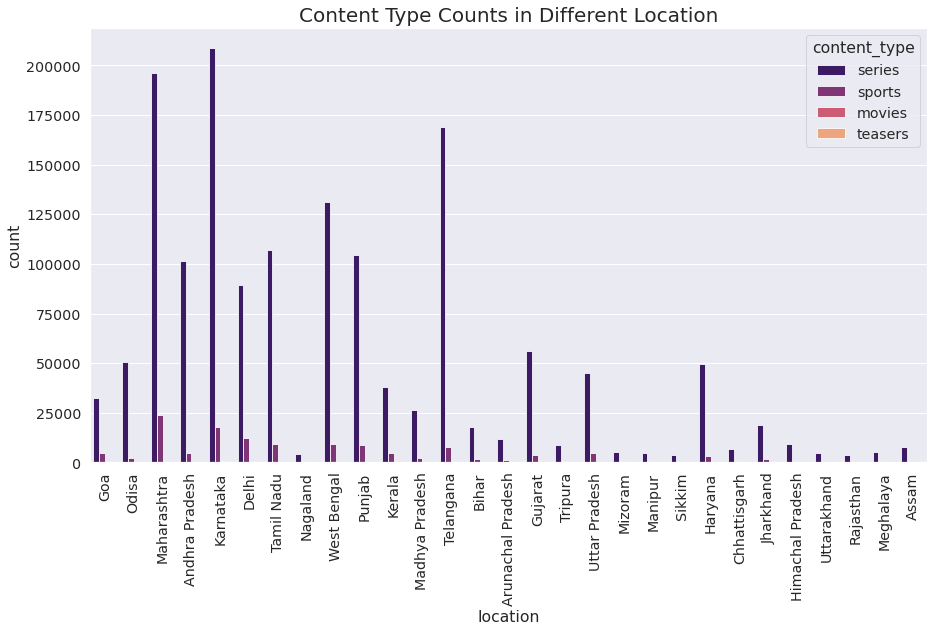

In [10]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.title("Content Type Counts in Different Location", fontsize=20)
sns.countplot(
    x='location',
    hue='content_type',
    data=df_map,
    palette='magma',
    linewidth=0.8,)

In [11]:
df_map['content_type'].value_counts()

series     1517727
sports      129778
movies        5158
teasers       1787
Name: content_type, dtype: int64

hindi        566153
english      545066
telugu       166543
kannada      108613
tamil         60283
bengali       58872
marathi       42934
malayalam     36486
punjabi       30805
gujarati      24041
oriya         14654
Name: language, dtype: int64


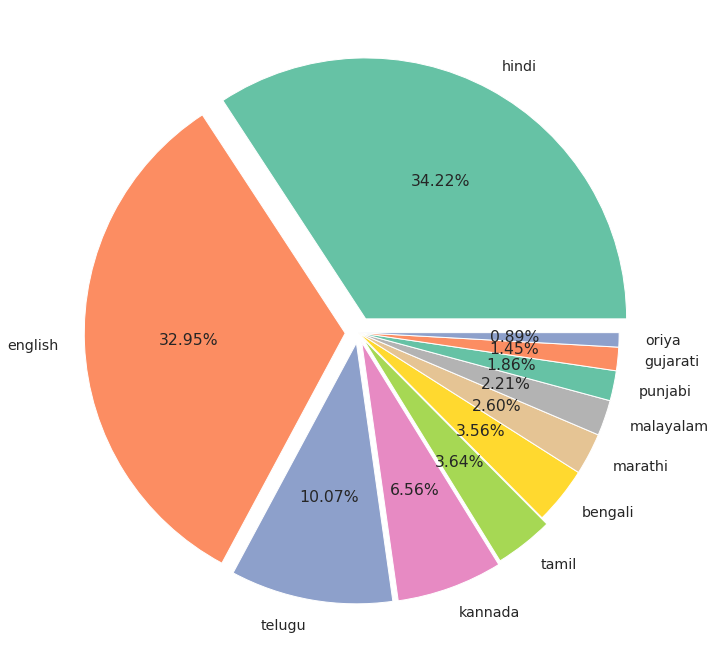

In [12]:
print(df_map['language'].value_counts())
colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(df_map['language'].value_counts(),
        labels=df_map['language'].value_counts().keys(),
        colors=colors,
        autopct='%2.2f%%',
        explode=(0.06, 0.05, 0.04, 0.04, 0.03, 0, 0, 0, 0, 0, 0))

plt.show()

In [13]:
df_map['genre'].value_counts().keys()

Index(['drama', 'comedy', 'action', 'horror', 'cricket', 'documentary',
       'sci-fi', 'football', 'basketball', 'badminton', 'tennis', 'hockey',
       'family', 'crime', 'biography', 'fantasy', 'adventure', 'animation',
       'thriller', 'sport', 'musical', 'mystery'],
      dtype='object')

drama          735321
comedy         341569
action         249999
horror          78735
cricket         77584
documentary     62745
sci-fi          52353
football        26200
Others          16950
basketball      12994
Name: genre, dtype: int64


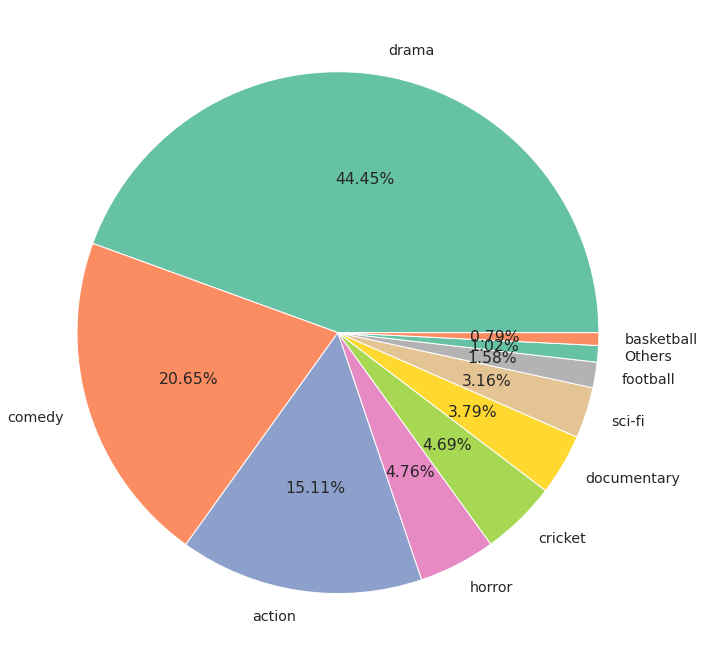

In [14]:
d_genere_map=df_map['genre'].map({'drama':'drama', 'comedy':'comedy', 'action':'action', 'horror':'horror', 'cricket':'cricket',\
                           'documentary':'documentary','sci-fi':'sci-fi', 'football':'football', 'basketball':'basketball',\
                           'badminton':'Others', 'tennis':'Others','hockey':'Others','family':'Others', 'crime':'Others', \
                           'biography':'Others', 'fantasy':'Others', 'adventure':'Others', 'animation':'Others',\
                           'thriller':'Others', 'sport':'Others', 'musical':'Others', 'mystery':'Others'})
print(d_genere_map.value_counts())
colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(d_genere_map.value_counts(),
        labels=d_genere_map.value_counts().keys(),
        colors=colors,
        autopct='%0.2f%%')
plt.show()

<AxesSubplot:title={'center':'Age Range in Different Locations'}, xlabel='count', ylabel='location'>

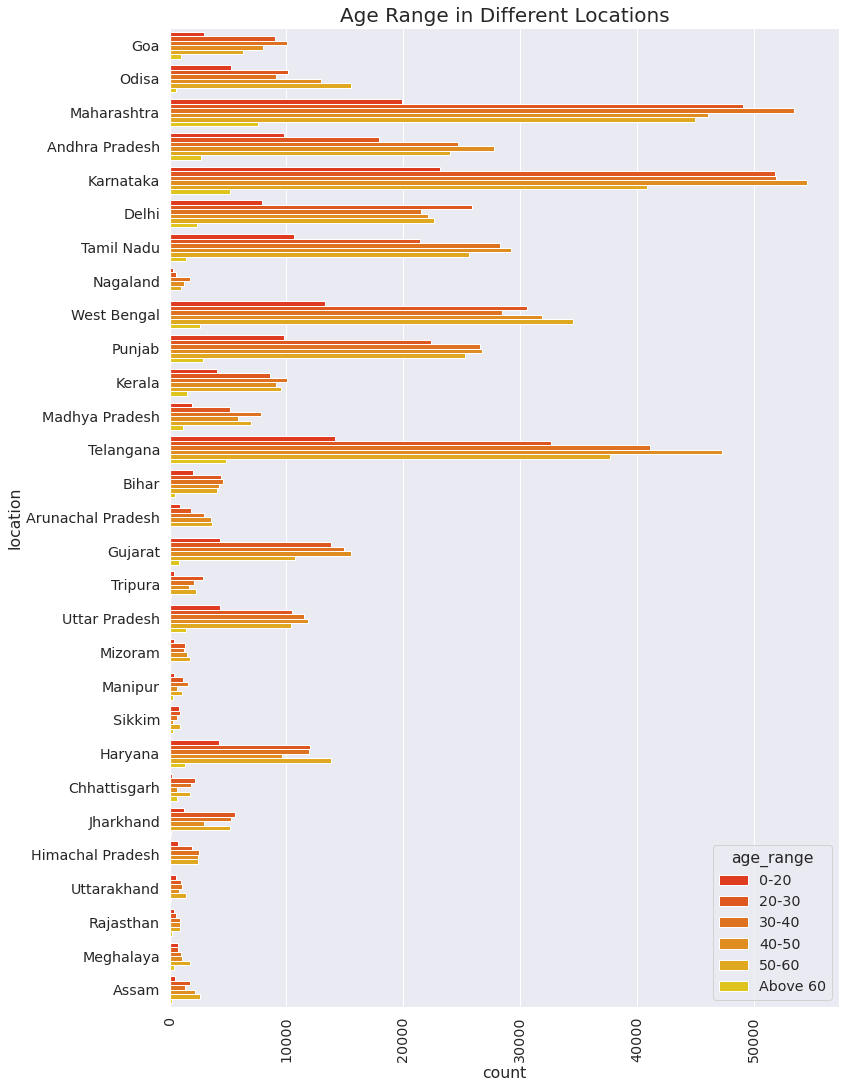

In [15]:
sns.set(font_scale=1.3)
plt.figure(figsize=(12, 18))
plt.xticks(rotation=90)
plt.title("Age Range in Different Locations", fontsize=20)
hue_order = ['0-20', '20-30', '30-40', '40-50', '50-60', 'Above 60']
sns.countplot(
    y='location',
    hue='age_range',
    data=df_map,
    hue_order=hue_order,
    palette='autumn')

# **<span style="color:#ff4871;">Data Mapping and Processing</span>**

In [16]:
df_map['gender'] = df_map['gender'].map({'F': 0, 'M': 1})

In [17]:
location_map = {}
j = 1
for i in df_map['location'].value_counts().keys():
    location_map[i] = j
    j = j + 1

    
    
    
location_map

{'Karnataka': 1,
 'Maharashtra': 2,
 'Telangana': 3,
 'West Bengal': 4,
 'Tamil Nadu': 5,
 'Punjab': 6,
 'Andhra Pradesh': 7,
 'Delhi': 8,
 'Gujarat': 9,
 'Odisa': 10,
 'Haryana': 11,
 'Uttar Pradesh': 12,
 'Kerala': 13,
 'Goa': 14,
 'Madhya Pradesh': 15,
 'Jharkhand': 16,
 'Bihar': 17,
 'Arunachal Pradesh': 18,
 'Himachal Pradesh': 19,
 'Tripura': 20,
 'Assam': 21,
 'Chhattisgarh': 22,
 'Mizoram': 23,
 'Meghalaya': 24,
 'Manipur': 25,
 'Uttarakhand': 26,
 'Nagaland': 27,
 'Sikkim': 28,
 'Rajasthan': 29}

In [18]:
df_map['content_type'] = df_map['content_type'].map({
    'series': 1,
    'sports': 2,
    'movies': 3,
    'teasers': 4})

In [19]:
language_map = {}
j = 1
for i in df_map['language'].value_counts().keys():
    language_map[i] = j
    j = j + 1
language_map

{'hindi': 1,
 'english': 2,
 'telugu': 3,
 'kannada': 4,
 'tamil': 5,
 'bengali': 6,
 'marathi': 7,
 'malayalam': 8,
 'punjabi': 9,
 'gujarati': 10,
 'oriya': 11}

In [20]:
df_map['language'] = df_map['language'].map(language_map)

In [21]:
genre_map = {}
j = 1
for i in df_map['genre'].value_counts().keys():
    genre_map[i] = j
    j = j + 1

genre_map

{'drama': 1,
 'comedy': 2,
 'action': 3,
 'horror': 4,
 'cricket': 5,
 'documentary': 6,
 'sci-fi': 7,
 'football': 8,
 'basketball': 9,
 'badminton': 10,
 'tennis': 11,
 'hockey': 12,
 'family': 13,
 'crime': 14,
 'biography': 15,
 'fantasy': 16,
 'adventure': 17,
 'animation': 18,
 'thriller': 19,
 'sport': 20,
 'musical': 21,
 'mystery': 22}

In [22]:
df_map['genre'] = df_map['genre'].map(genre_map)

In [23]:
df_map['joining_date'] = pd.to_datetime(df_map['joining_date'])

df_map['date'] = pd.to_datetime(df_map['date'])\

df_map['release_date'] = pd.to_datetime(df_map['release_date'])

In [24]:
df_map['user_joined_days'] = (df_map['date'] - df_map['joining_date']).dt.days

In [25]:
df_map['movie_old_days'] = (df_map['date'] - df_map['release_date']).dt.days

In [26]:
df_map['percentage_watched'] = 1 - (
    df_map['duration_y'] - df_map['duration_x']) / df_map['duration_y']


df_map['percentage_watched']

0          0.725490
1          0.647059
2          0.843137
3          0.137255
4          0.450980
             ...   
1654445    0.576923
1654446    0.807692
1654447    0.173077
1654448    0.153846
1654449    0.730769
Name: percentage_watched, Length: 1654450, dtype: float64

In [27]:
df_map = df_map.drop(columns=[
    'duration_x', 'duration_y', 'start_time', 'end_time', 'release_date',
    'date', 'joining_date'])

In [28]:
def distplot(figRows,figCols,xSize, ySize, data, features, colors, kde=True, bins=None):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.histplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde)
            plot.set_xlabel(features[row][col],fontsize=20)

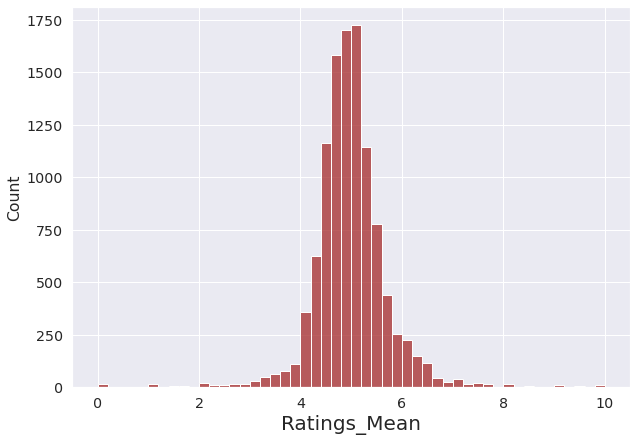

In [29]:
ratings = pd.DataFrame(df_map.groupby('user_id')['rating'].mean())
ratings.rename(columns={"rating": "Ratings_Mean"}, inplace=True)
distplot(1, 1, 10, 7, data=ratings, features=['Ratings_Mean'], colors=['brown'], kde=False, bins=50)

# <span style="color:#ff4871;">Observations</span>
This is a mean rating distribution grouped by all the movies watched.

As it can been seen from the plot, there are many products which were given a Rating of 4 to 6. Hence the plot shows lot of bins between 4 and 6.

# <span style="color:#ff4871;">Pivot Table for user interaction for content Based Filtering</span>

In [30]:
 df_map.pivot_table(index='user_id', columns='content_id', values='rating')

content_id,cont_1000_1_10,cont_1000_1_12,cont_1000_1_16,cont_1000_1_25,cont_1000_2_1,cont_1000_2_10,cont_1000_2_13,cont_1000_2_18,cont_1000_3_1,cont_1000_3_19,...,cont_994_1_5,cont_996_1_5,cont_996_1_6,cont_996_1_7,cont_998_1_4,cont_999_1_6,cont_99_1_6,cont_99_1_7,cont_9_1_4,cont_9_1_8
user_id,,,,,,,,,,,,,,,,,,,,,
user_10013@domain.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_10034@domain.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_10042@domain.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_10052@domain.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_10069@domain.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_99961@domain.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_99962@domain.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_99971@domain.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


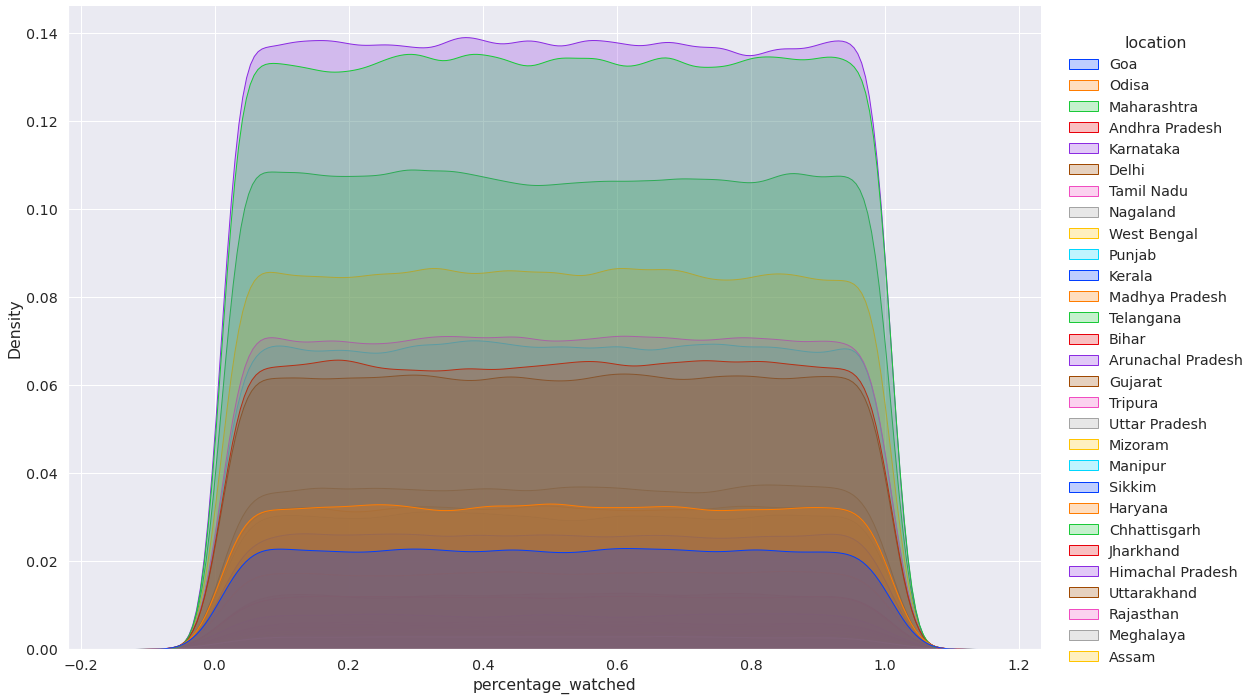

In [31]:
sns.displot(data=df_map, x='percentage_watched', hue='location', kind='kde', fill=True, height=10,palette=sns.color_palette('bright', n_colors=len(location_map)), aspect=1.5)# ""","""

Text(0.5, 0.98, 'Top 10 content watched in top 4 states Content Watched')

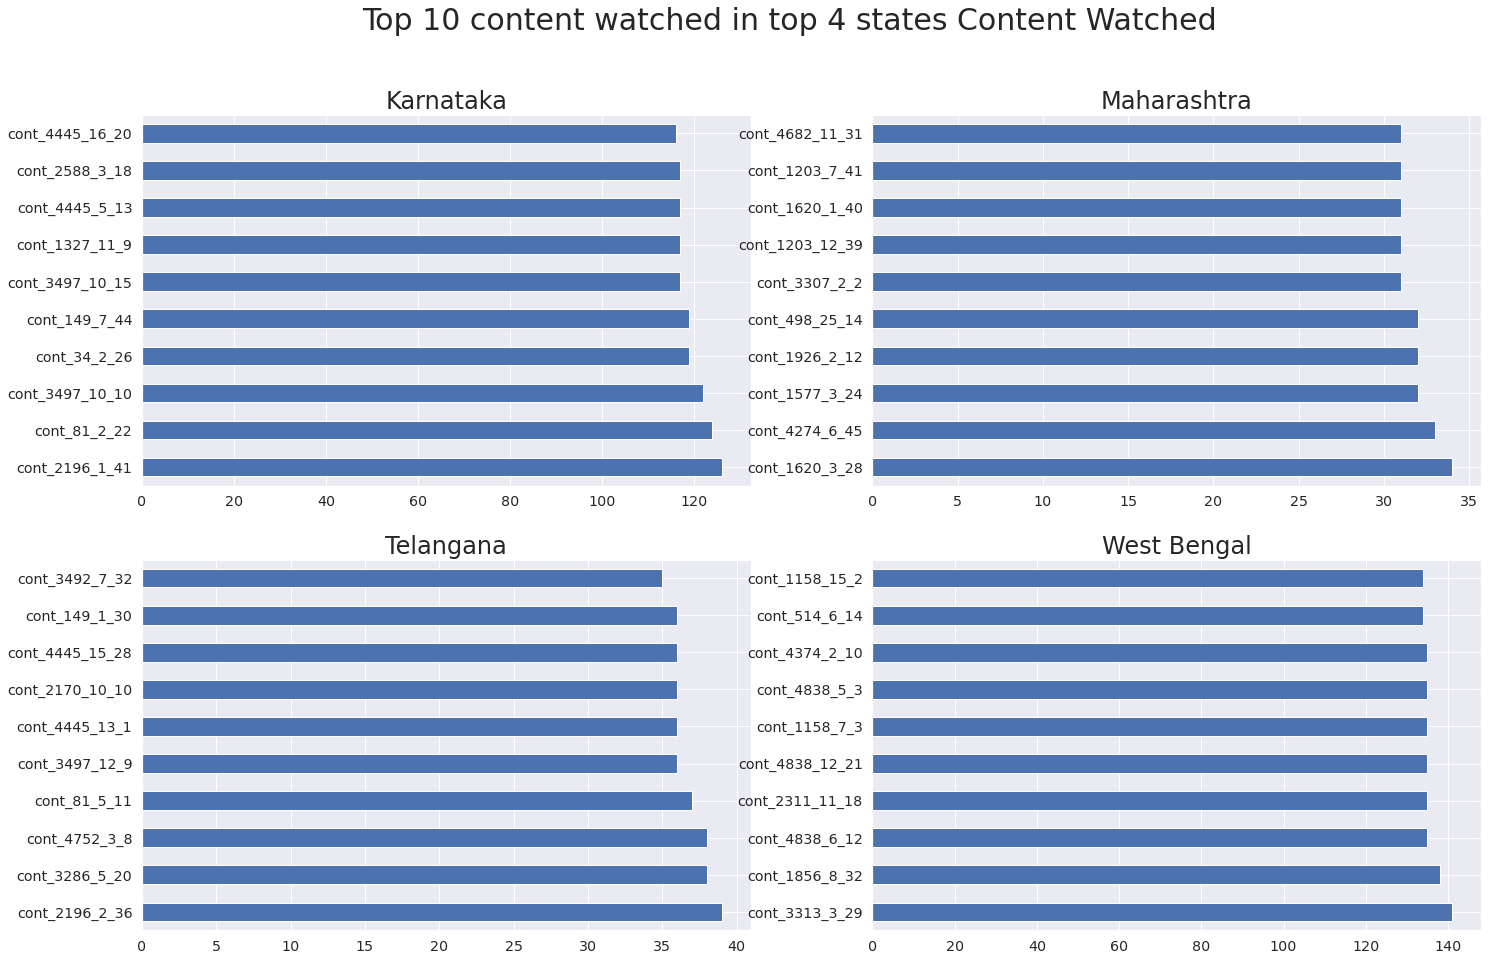

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=( 24,15))
df_map.groupby(['location']).get_group('Karnataka')['content_id'].value_counts()[0:10].plot(kind = 'barh',ax=axes[0,0],)
axes[0,0].set_title('Karnataka', size=24)
df_map.groupby(['location']).get_group('Maharashtra')['content_id'].value_counts()[0:10].plot(kind = 'barh',ax=axes[0,1])
axes[0,1].set_title('Maharashtra', size=24)
df_map.groupby(['location']).get_group('Telangana')['content_id'].value_counts()[0:10].plot(kind = 'barh',ax=axes[1,0])
axes[1,0].set_title('Telangana', size=24)
df_map.groupby(['location']).get_group('West Bengal')['content_id'].value_counts()[0:10].plot(kind = 'barh',ax=axes[1,1])
axes[1,1].set_title('West Bengal', size=24)


fig.suptitle('Top 10 content watched in top 4 states Content Watched' , size=30)

In [33]:
df_map['location'] = df_map['location'].map(location_map)

In [34]:
df_map['content_id'].value_counts()

cont_3497_10_10    184
cont_81_2_22       181
cont_208_10_3      178
cont_2196_2_36     177
cont_2196_2_45     176
                  ... 
cont_4060_1_6        7
cont_2237_7_10       6
cont_3420_10_19      6
cont_678_9_6         6
cont_2722_9_24       5
Name: content_id, Length: 44223, dtype: int64

In [35]:
df_map.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654450 entries, 0 to 1654449
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1654450 non-null  object 
 1   user_age            1654450 non-null  int64  
 2   gender              1654450 non-null  int64  
 3   location            1654450 non-null  int64  
 4   age_range           1654450 non-null  object 
 5   content_id          1654450 non-null  object 
 6   content_type        1654450 non-null  int64  
 7   language            1654450 non-null  int64  
 8   genre               1654450 non-null  int64  
 9   rating              1654450 non-null  int64  
 10  episode_count       1654450 non-null  int64  
 11  season_count        1654450 non-null  int64  
 12  user_joined_days    1654450 non-null  int64  
 13  movie_old_days      1654450 non-null  int64  
 14  percentage_watched  1654450 non-null  float64
dtypes: float64(1), 

In [36]:
df_test

,user_id
0,user_18085@domain.com
1,user_16044@domain.com
2,user_13110@domain.com
3,user_18909@domain.com
4,user_15509@domain.com
...,...
1435,user_1609@domain.com
1436,user_13422@domain.com
1437,user_85709@domain.com
1438,user_10393@domain.com


In [37]:
df_test_map = pd.merge(df_test, df_user, on='user_id')
df_test_map

,user_id,user_age,gender,location,joining_date,age_range
0,user_18085@domain.com,40,M,Telangana,2018-12-08,40-50
1,user_16044@domain.com,43,F,Odisa,2017-10-13,40-50
2,user_13110@domain.com,46,F,West Bengal,2018-10-21,40-50
3,user_18909@domain.com,32,F,Goa,2019-01-05,30-40
4,user_15509@domain.com,31,F,Maharashtra,2020-04-26,30-40
...,...,...,...,...,...,...
1435,user_1609@domain.com,38,M,Punjab,2018-03-17,30-40
1436,user_13422@domain.com,43,M,Punjab,2018-04-02,40-50
1437,user_85709@domain.com,59,F,Delhi,2019-01-18,50-60
1438,user_10393@domain.com,59,M,Karnataka,2020-09-18,50-60


In [38]:
df_test_map['gender'] = df_test_map['gender'].map({'F': 0, 'M': 1})

df_test_map['location'] = df_test_map['location'].map(location_map)

df_test_map["age_range"] = df_test_map.apply(age_range_fn, axis=1)

df_test_map

,user_id,user_age,gender,location,joining_date,age_range
0,user_18085@domain.com,40,1,3,2018-12-08,40-50
1,user_16044@domain.com,43,0,10,2017-10-13,40-50
2,user_13110@domain.com,46,0,4,2018-10-21,40-50
3,user_18909@domain.com,32,0,14,2019-01-05,30-40
4,user_15509@domain.com,31,0,2,2020-04-26,30-40
...,...,...,...,...,...,...
1435,user_1609@domain.com,38,1,6,2018-03-17,30-40
1436,user_13422@domain.com,43,1,6,2018-04-02,40-50
1437,user_85709@domain.com,59,0,8,2019-01-18,50-60
1438,user_10393@domain.com,59,1,1,2020-09-18,50-60


In [39]:
%%time
def combined_features(row):
    return [
        row['user_age'], row['gender'], row['location'], row['content_type'],
        row['language'], row["genre"], row['rating'], row['episode_count'],
        row["season_count"], row['user_joined_days'], row['movie_old_days'],
        row["percentage_watched"]
    ]

df_map["combined_features"] = df_map.apply(combined_features, axis=1)

CPU times: user 1min 35s, sys: 669 ms, total: 1min 36s
Wall time: 1min 36s


In [40]:
%%time
list_test = []
for i in tqdm(df_test['user_id']):
    list_test.extend(list(df_map[df_map['user_id'] == i].index))
    
pprint(list(list_test[1:10]))

  0%|          | 0/1440 [00:00<?, ?it/s]

[58430, 60310, 61681, 164551, 167979, 171425, 174977, 252368, 255612]
CPU times: user 3min 3s, sys: 817 ms, total: 3min 4s
Wall time: 3min 2s


In [41]:
data_test = df_map.iloc[list_test].copy(deep=True)
data_test

,user_id,user_age,gender,location,age_range,content_id,content_type,language,genre,rating,episode_count,season_count,user_joined_days,movie_old_days,percentage_watched,combined_features
45227,user_18085@domain.com,40,1,3,40-50,cont_1154_4_22,1,8,6,1,22,4,621,2384,0.187500,"[40, 1, 3, 1, 8, 6, 1, 22, 4, 621, 2384, 0.1875]"
58430,user_18085@domain.com,40,1,3,40-50,cont_3036_5_26,1,3,1,8,26,5,490,5670,0.587302,"[40, 1, 3, 1, 3, 1, 8, 26, 5, 490, 5670, 0.587..."
60310,user_18085@domain.com,40,1,3,40-50,cont_1421_12_10,1,3,7,9,10,12,315,1940,0.636364,"[40, 1, 3, 1, 3, 7, 9, 10, 12, 315, 1940, 0.63..."
61681,user_18085@domain.com,40,1,3,40-50,cont_4683_2_4,1,3,6,3,4,2,958,5781,0.413043,"[40, 1, 3, 1, 3, 6, 3, 4, 2, 958, 5781, 0.4130..."
164551,user_18085@domain.com,40,1,3,40-50,cont_1094_4_26,1,3,1,1,26,4,630,2004,0.962963,"[40, 1, 3, 1, 3, 1, 1, 26, 4, 630, 2004, 0.962..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552074,user_13498@domain.com,44,0,5,40-50,cont_1065_11_37,1,5,3,3,37,11,537,3382,0.454545,"[44, 0, 5, 1, 5, 3, 3, 37, 11, 537, 3382, 0.45..."
1570875,user_13498@domain.com,44,0,5,40-50,cont_4934_5_10,1,5,6,6,10,5,276,7451,0.478261,"[44, 0, 5, 1, 5, 6, 6, 10, 5, 276, 7451, 0.478..."
1570993,user_13498@domain.com,44,0,5,40-50,cont_988_13_1,1,5,2,5,1,13,514,5721,0.185185,"[44, 0, 5, 1, 5, 2, 5, 1, 13, 514, 5721, 0.185..."
1576375,user_13498@domain.com,44,0,5,40-50,cont_1314_3_7,1,5,1,5,7,3,252,4861,0.072727,"[44, 0, 5, 1, 5, 1, 5, 7, 3, 252, 4861, 0.0727..."


In [42]:
len(data_test['user_id'].value_counts())

1002

In [43]:
def popularity_based_watched_colaborative_recommender_model(user_location,user_gender,df_map1,df_map1_group,):
    
    rank_sorted_predictions=list(
        df_map1_group.get_group(
            (user_gender,
             user_location)).sort_values(by=['percentage_watched', 'rating'],
                                         ascending=True)['content_id'][0:10])
    return rank_sorted_predictions
    

In [44]:
%%time
submit = {}
test_group = data_test.groupby('user_id')

df_map1 = df_map.copy(deep=True)
df_map1_group = df_map1.groupby(['gender', 'location'])
for user in tqdm(df_test_map['user_id']):
    user_location = int(df_test_map[df_test_map['user_id'] == user]['location'])
    user_gender = int(df_test_map[df_test_map['user_id'] == user]['gender'])
    submit[user] = popularity_based_watched_colaborative_recommender_model(user_location,user_gender,df_map1,df_map1_group,)

  0%|          | 0/1440 [00:00<?, ?it/s]

CPU times: user 1min 12s, sys: 254 ms, total: 1min 12s
Wall time: 1min 12s


In [45]:
pd.DataFrame(submit)

,user_18085@domain.com,user_16044@domain.com,user_13110@domain.com,user_18909@domain.com,user_15509@domain.com,user_10536@domain.com,user_14011@domain.com,user_11121@domain.com,user_14901@domain.com,user_18370@domain.com,...,user_11243@domain.com,user_13107@domain.com,user_11776@domain.com,user_11803@domain.com,user_10398@domain.com,user_1609@domain.com,user_13422@domain.com,user_85709@domain.com,user_10393@domain.com,user_13498@domain.com
0,cont_964_1_1,cont_1820_1_3,cont_2503_1_7,cont_2313_1_5,cont_318_1_9,cont_318_1_9,cont_3338_1_1,cont_1980_1_17,cont_3990_4_20,cont_1931_1_7,...,cont_318_1_9,cont_2050_1_4,cont_387_1_8,cont_2503_1_7,cont_1952_1_4,cont_195_1_1,cont_195_1_1,cont_387_1_8,cont_914_1_8,cont_3338_1_1
1,cont_473_1_5,cont_3405_3_33,cont_731_1_6,cont_680_1_4,cont_4979_1_6,cont_4979_1_6,cont_1952_1_4,cont_1980_1_9,cont_3990_1_1,cont_2401_1_20,...,cont_4979_1_6,cont_4938_1_1,cont_3410_1_5,cont_731_1_6,cont_662_1_4,cont_2830_1_4,cont_2830_1_4,cont_3410_1_5,cont_2574_1_3,cont_1952_1_4
2,cont_2878_11_15,cont_3990_5_17,cont_1708_1_1,cont_2978_1_4,cont_4979_1_6,cont_4979_1_6,cont_4429_1_2,cont_315_1_4,cont_475_21_31,cont_2394_3_8,...,cont_4979_1_6,cont_1520_1_14,cont_1478_1_8,cont_1708_1_1,cont_2878_4_18,cont_2909_1_10,cont_2909_1_10,cont_1478_1_8,cont_597_1_5,cont_4429_1_2
3,cont_2394_3_30,cont_4098_4_56,cont_575_1_4,cont_2563_1_2,cont_2272_1_11,cont_2272_1_11,cont_2529_1_9,cont_3226_1_6,cont_2299_1_17,cont_2708_1_25,...,cont_2272_1_11,cont_4394_1_6,cont_427_1_10,cont_575_1_4,cont_4281_2_4,cont_1082,cont_1082,cont_427_1_10,cont_597_1_5,cont_2529_1_9
4,cont_2878_14_5,cont_2380_12_9,cont_1507_1_6,cont_3777_1_8,cont_2415_1_8,cont_2415_1_8,cont_4430_1_5,cont_786_1_4,cont_3990_2_43,cont_787_1_6,...,cont_2415_1_8,cont_964_1_3,cont_1181,cont_1507_1_6,cont_1210_20_6,cont_1082,cont_1082,cont_1181,cont_1952_1_2,cont_4430_1_5
5,cont_2196_5_33,cont_3556_2_9,cont_1721_1_6,cont_3777_1_7,cont_1952_1_2,cont_1952_1_2,cont_915_1_1,cont_475_3_16,cont_1625_6_30,cont_3405_1_32,...,cont_1952_1_2,cont_689_1_7,cont_4290_1_5,cont_1721_1_6,cont_4098_4_42,cont_1229,cont_1229,cont_4290_1_5,cont_3255_1_9,cont_915_1_1
6,cont_2878_16_32,cont_222_6_6,cont_1210_16_13,cont_1006_1_5,cont_1716_1_16,cont_1716_1_16,cont_2124,cont_3791_24_7,cont_1972_3_17,cont_2899_4_6,...,cont_1716_1_16,cont_598_1_8,cont_1229,cont_1210_16_13,cont_1060_1_21,cont_1336,cont_1336,cont_1229,cont_1520_1_5,cont_2124
7,cont_2878_10_16,cont_4427_3_2,cont_2516_1_7,cont_40_1_4,cont_4398_1_1,cont_4398_1_1,cont_1210_27_13,cont_2196_6_11,cont_1006_1_8,cont_4098_4_49,...,cont_4398_1_1,cont_4135_1_18,cont_915_1_5,cont_2516_1_7,cont_1368_4_5,cont_4222,cont_4222,cont_915_1_5,cont_3044_1_2,cont_1210_27_13
8,cont_2196_5_55,cont_2708_4_23,cont_2708_5_20,cont_2071_1_6,cont_1563_1_6,cont_1563_1_6,cont_475_12_12,cont_3364_6_2,cont_475_2_24,cont_4136_1_11,...,cont_1563_1_6,cont_3123_1_13,cont_680_1_7,cont_2708_5_20,cont_1210_23_10,cont_941_1_2,cont_941_1_2,cont_680_1_7,cont_1510_1_4,cont_475_12_12
9,cont_2196_2_54,cont_2104_23_7,cont_4843_1_5,cont_3791_29_1,cont_1175_1_8,cont_1175_1_8,cont_2878_8_19,cont_1972_4_27,cont_4427_4_9,cont_3990_11_42,...,cont_1175_1_8,cont_2172_1_3,cont_2004_1_9,cont_4843_1_5,cont_1210_27_11,cont_3791_32_6,cont_3791_32_6,cont_2004_1_9,cont_3245,cont_2878_8_19


# Dumping Final submission file in Json format 

In [46]:
import json
with open('submit_solution_final.json', 'w') as fp:
    json.dump(submit, fp)